<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('seaborn-dark')

# IntML2020- KDE y KNN

# Ejercicio 1: 

Sea $p(x)\sim U(0,a)$ uniforme en [0,a] y sea $\phi(x)=\exp(x), x>0$ el kernel exponencial. 

* a) Muestre que la esperanza del estimador basado en ventana de Parzen exponencial es  
\begin{equation}
\overline{p}_{n}(x)=\left\{\begin{array}{ll}{0} & {x<0} \\ {\frac{1}{a}\left(1-e^{-x / h_{n}}\right)} & {0 \leq x \leq a} \\ {\frac{1}{a}\left(e^{a / h_{n}}-1\right) e^{-x / h_{n}}} & {a \leq x}\end{array}\right.
\end{equation}

* b) Plotee esta curva con a=1, $h_n$=1, 1/4 y 1/16

* c) Cuan chico tiene que ser $h_n$ para tener menos del 1% de desvio sobre el 99\% del rango 0<x<a?

* d) Encuentre $h_n$ para esta condicion si a=1 y plotee $\overline{p}_n(x)$ en el rango $0\leq x \leq 0.05$ 

# *Respuesta*

 <span style="color:red"> INCISO  (a)  </span>
 
 Tenemos que el estimador de la densidad, para una muestra de tamaño $n$, está dado por:

$$\hat p_n(x) = \frac 1n \sum \frac 1{V_n} \phi\left(\frac{x-x_i}{h_n}\right),$$
donde $x_i$ son las muestras que caen dentro de la región de volumen $V_n$ centrada en $x$.

Esta región es, para el caso general, un hipercubo de lado $h_n$ y por lo tanto $V_n = h_n^d$, donde $d$ es la dimensión del espacio.

Si asumimos que las muestras $x_i$ provienen de una distribución uniforme $\mathcal U(0,a)$, y que $\phi(x) = e^{-x}$ para $x>0$, entonces el valor esperado de $\hat p_n(x)$ es:
\begin{eqnarray*}
E[\hat p_n(x)] &=& \frac 1n \sum \frac{1}{h^1} E[ e^{-\frac{x-x_i}{h_n}} \mathbb I_{(0,x)}(x_i)] \\ 
&=&
\frac 1n \sum \frac 1h \int_0^a e^{-\frac{x-u}{h_n}} \mathbb I_{(0,x)}(u)\frac 1a\,du
\end{eqnarray*}
La función indicadora está incluida porque la densidad exponencial es $0$ en los negativos.
Analizamos entonces los siguientes casos:
- si $x<0$, entonces para todo $u \in (0,a)$ se cumple $x-u<0$. Por lo tanto $\mathbb I_{(0,x)}(u) = 0$ y el valor esperado resulta $0$.
- si $x \ge a$, entonces para todo $u \in (0,a)$ se cumple $x-a>0$. Luego $\mathbb I_{(0,x)}(u) = 1$.
- si $0 < x < a$, entonces la integral en el valor esperado es nula para $u>x$. 

Observando que en la sumatoria se calcula siempre el mismo valor, se reemplaza por la multiplicación por $n$ y así tenemos que:

Caso $x\ge a$:
\begin{eqnarray*}
E[\hat p_n(x)] &=& \frac 1n \cdot n \frac 1{a\,h_n} \int_0^a e^{-\frac{x-u}{h_n}} \,du 
\\
&=& \frac 1{a\,h_n} e^{-x/h_n} (h_n) e^{u/h_n} \bigr|_0^a = \frac 1{ah_n} h_n e^{-x/h_n}\,(e^{a/h_n}-1) \\
&=& \frac 1a e^{-x/h_n} (e^{a/h_n}-1) 
\end{eqnarray*}

Caso $0<x<a$:
\begin{eqnarray*}
E[\hat p_n(x)] &=& \frac 1n \cdot n \frac 1{a\,h_n} \int_0^x e^{-\frac{x-u}{h_n}} \,du 
\\
&=& \frac 1{a\,h_n} e^{-x/h_n} (h_n) e^{u/h_n} \bigr|_0^x = \frac 1{ah_n} h_n e^{-x/h_n}\,(e^{x/h_n}-1) \\
&=& \frac 1a (1-e^{x/h_n}) 
\end{eqnarray*}

En particular si $h_n$ tiende a $0$ el valor esperado tiende a la distribución uniforme $p(x)$.

b) La varianza del estimador está dado por:
\begin{eqnarray}
Var(\hat p) = E[(\hat p - p)^2] &=& \int_0^a \frac 1a\,1-\hat p(u))^2\,du = \frac 1{a^2}
\int_0^a (1- (1-e^{-u/h_n}))^2 \,du \\
&=& \frac 1{a^2} \int_0^a e^{-2u/h_n}\,du \\
&=& \frac{-h_n}{2a^2} e^{-2u/h_n}\bigr|_0^a = \frac{h_n}{2a^2}\left(1-e^{-2a/h_n}\right).
\end{eqnarray}

El sesgo (bias) sobre $0<x<a$ es:
$$ \hat p(x) - p(x) = \frac 1a \,(1 - (1-e^{-x/h_n}) = \frac 1a e^{-x/h_n}.$$
Este sesgo es decreciente en $x$. Entonces para que el sesgo sea menor que el 1% en el 99% del intervalo $(0,a)$ calculamos:
\begin{eqnarray}
\frac 1a e^{-x/h_n} &<& 0.01, \qquad x \ge 0.01 \cdot a,\\
-\frac x{h_n}  &<& \ln 0.01 + \ln a \\
-\frac x{\ln (0.01 \cdot a)} &>& h_n, \qquad x \ge 0.01\cdot a \\
h_n &<& \frac{0.01}{- \ln (0.01\cdot a)} = 0.01\cdot a \cdot \ln(100/a).
\end{eqnarray}
Para el caso $a=1$ resulta $h_n < 0.046$, aproximadamente.




 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

\begin{equation}
\overline{p}_{n}(x)=\left\{\begin{array}{ll}{0} & {x<0} \\ {\frac{1}{a}\left(1-e^{-x / h_{n}}\right)} & {0 \leq x \leq a} \\ {\frac{1}{a}\left(e^{a / h_{n}}-1\right) e^{-x / h_{n}}} & {a \leq x}\end{array}\right.
\end{equation}


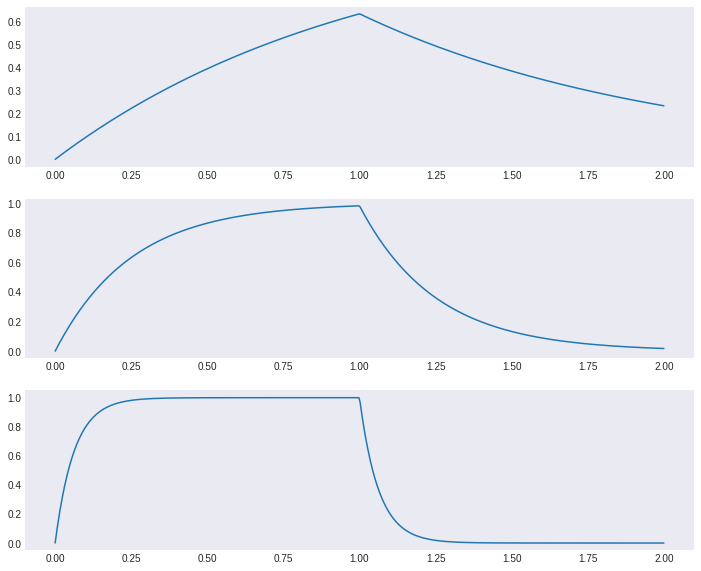

In [49]:
x = np.linspace(0,2,500)
h_n = [1,1/4,1/16]
a = 1
funcs = [lambda x: (1/a) * (1-np.exp(-x/h)),lambda x: (1/a) * (np.exp(a/h)-1)*(np.exp(-x/h)) ]
conds = [(0 < x) & (x < a), a< x]
fig = plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
h = 1
f = np.piecewise(x, conds, funcs)
plt.plot(x,f)

plt.subplot(3,1,2)
h = 1/4
f = np.piecewise(x, conds, funcs)
plt.plot(x,f)

plt.subplot(3,1,3)
h = 1/16
f = np.piecewise(x, conds, funcs)
plt.plot(x,f)


 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO  (d) AQUÍ </span>

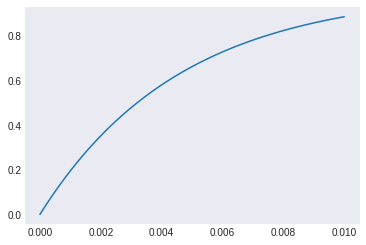

In [51]:
x = np.linspace(0,0.010,500)
a = 1
funcs = [lambda x: (1/a) * (1-np.exp(-x/h)),lambda x: (1/a) * (np.exp(a/h)-1)*(np.exp(-x/h)) ]
conds = [(0 < x) & (x < a), a< x]
h = 0.0046
f = np.piecewise(x, conds, funcs)
plt.plot(x,f)

# Ejercicio 2:  
Pruebe que si $P^*$ es el error de bayes, y
\begin{equation}
P=\lim _{n \rightarrow \infty} P_{n}(e)
\end{equation}
es el error de la regla del vecino mas cercano, entonces 
\begin{equation}
P^{*} \leq P \leq P^{*}\left(2-\frac{c}{c-1} P^{*}\right)
\end{equation}
 use las paginas 179 a 182 del libro para esbozar su prueba. 


# *Respuesta*

Denotamos con $P_n(e)$ la probabilidad del error para la regla del vecino más cercano y muestras de tamaño $n$.

El error ocurre para una muestra $x'$ que es vecino más cercano de $x$ si a $x'$ se lo clasifica en una clase errónea. Es decir que:
$$P_n(e) = \sum_{x,x'}P_n(e | x,x').p(x,x').$$

Dadas las $n$ muestras correspondientes a $c$ clases distintas, cada muestra es un par $(x',\theta_j)$, donde $\theta_j$ significa que $x'$ corresponde a la clase $j$.
Así un error ocurre si $x'$ es el vecino más cercano a $x$, y $\theta_j$ es distinto de la clase $\theta$ de $x$. Asumiendo que las muestras son todas independientes tenemos que:
$$P(\theta, \theta_j | x,x') = P(\theta|x)P(\theta_j|x').$$

Sumando sobre todas la posibles clases de $x$ ($1 \le i \le c$), la probabilidad del error es uno menos la probabilidad de los aciertos:
$$P(e | x,x') = 1 - \sum_i P(\theta=i, \theta_j=i|x,x') = 1- \sum_j P(\theta|x) P(\theta_j=i|x').$$

Ahora bien, tenemos que
$$P(e | x) = \int P(e|x,x')p(x'|x)dx' = \int\left( 1- \sum_j P(\omega_i|x) P(\omega_i|x') \right)p(x'|x)dx'.$$
Si $n$ tiende a infinito, entonces $x'$ está muy próximo a $x$ y podemos asumir que la densidad $p(x'|x)$ converge a una delta de Dirac:
$$p(x'|x) \mapsto _{n \to \infty} \delta(x-x'),$$
y entonces resulta:
$$P(e | x) = \int\left( 1- \sum_j P(\omega_i|x) P(\omega_i|x') \right)\delta(x-x')dx' = 1 - \sum_{i=1}^c P^2(\omega_i|x).$$
Volviendo al error de Bayes, es evidente que $P^* \le P$. Para ver la cota superior, consideramos $x$ y su clase $\omega_m$. Queremos minimizar:
$$\sum_{i=1}^c P^2(\omega_i|x) = P^2(\omega_m|x) + \sum_{i\neq m}^c P^2(\omega_i|x).$$

El segundo término se minimiza si todas las probabilidades en la sumatoria son iguales, esto es:
$$P(\omega_i|x) = \frac{1-P(\omega_m|x)}{c-1}.$$
Como $1-P(\omega_m|x) = P^*(e|x)$ tenemos que:
$$\sum_{i=1}^c P^2(\omega_i | x) \ge (1-P^*(e | x))^2 + \frac{P^{*2}(e|x)}{c-1}.$$
Por otra parte,
$$Var(P^*(e|x)) = \int[P^*(e|x)-P^*)^2 p(x)dx = \int P^{*2}(e|x)p(x)dx - P^{*2} \ge 0$$
de donde
$$\int P^{*2}(e|x)p(x)dx \ge P^{*2}.$$
Uniendo las fórmulas resulta, para un número infinito de muestras,
$$P^* \le P \le P^* \cdot \left(2-\frac{c}{c-1}P^*\right).$$


# Ejercicio 3 

 a) Estudie el siguiente código que realiza un estimador nuevo basado en Ventana de Parzen gaussiana dentro de el framework de scikitlearn
 * Observe que usando la función del paquete sklearn.neighbors KernelDensity se crea un nuevo clasificador bayesiano basado en la estimacion de ventanas de Parzen con kernels especificados. 
 * Identifique los priors y la función de pérdida codificada. 
 * Identifique que linea del código cambiaría si quisiera usar otro discriminante, por ejemplo, si quisiera ingresar función de pérdida general y priors como parámetros. 

In [54]:
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.neighbors import KernelDensity
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        #Acá se calculan las probabilidades a priori empiricas
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        # Acá en result habría que sumar la función de pérdida en caso de querer
        # agregar una
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]
    

 (b) Estudie el siguiente código  donde se busca el mejor bandwidth usando GridSearchCV y plots auxiliares

In [60]:

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
digits = load_digits()

## datos son data y etiquetas target 

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


Text(0.5, 1.0, 'KDE Model Performance')

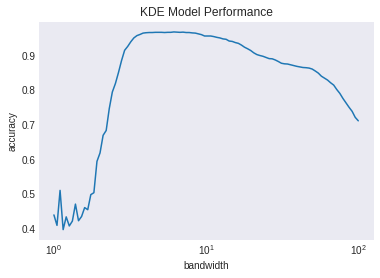

In [56]:
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})

grid.fit(digits.data, digits.target)

print(grid.best_params_)
print('accuracy =', grid.best_score_)

scores = grid.cv_results_['mean_test_score']
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

(c) Ajuste el clasificador codificado con Kernel gaussiano a la database dígitos,  usando el ancho de banda  default. Compare con el valor  estimado usando  GridSearchCV. Diga cual es la exactitud (accuracy) usando el bandwidth estimado y cual es la exactitud usando el default. 


(d) Encuentre el ancho de banda óptimo usando GridSearchCV para clasificadores con  kernels Exponencial  y de Echetnikov para la database digits. Compare el valor de accuracy que le corresponde con el generado usando el default. 
    

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

La función de pérdida utilizada es la pérdida 0-1 "default" y las probabilidades a piori son las empiricas logarítmicas. Se calculan a partir de la muestra

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

In [69]:
X = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
kde = KDEClassifier()
kde.fit(X_train,y_train)
preds = kde.predict(X_test)
score = np.mean([y == pred for y,pred in zip(y_test,preds)])
score

0.4777777777777778

In [70]:
kde = KDEClassifier(bandwidth=6.13)
kde.fit(X_train,y_train)
preds = kde.predict(X_test)
score = np.mean([y == pred for y,pred in zip(y_test,preds)])
score

0.9833333333333333

Podemos ver que el clasificador mejora INCREIBLEMENTE usando el bandwith estimado. 

 <span style="color:red"> RESPONDA EL INCISO  (d) AQUÍ </span>

### Kernel exponencial

{'bandwidth': 1.8307382802953682}
accuracy = 0.9671757969668834


Text(0.5, 1.0, 'KDE Model Performance')

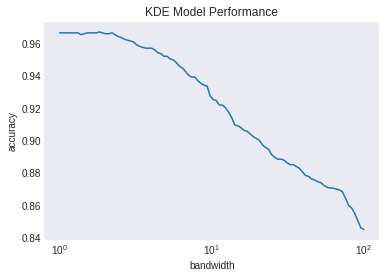

In [77]:
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(kernel='exponential'), {'bandwidth': bandwidths})

grid.fit(digits.data, digits.target)

print(grid.best_params_)
print('accuracy =', grid.best_score_)

scores = grid.cv_results_['mean_test_score']
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

Kernel exponencial, con bandwidth default

In [75]:
kde = KDEClassifier(kernel='exponential')
kde.fit(X_train,y_train)
preds = kde.predict(X_test)
score = np.mean([y == pred for y,pred in zip(y_test,preds)])
score

0.9833333333333333

En este caso, como el bandwith default no es tan lejano al mejor encontrado por gridsearch, podemos ver que el clasificador funciona
incluso un poquito mejor con el default. Igual esto depende de los datos en cierta medida

### Kernel echentnikov

{'bandwidth': 29.836472402833405}
accuracy = 0.9599442896935934


Text(0.5, 1.0, 'KDE Model Performance')

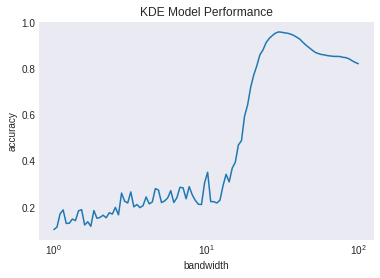

In [74]:
import warnings
warnings.filterwarnings('ignore')
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(kernel='epanechnikov'), {'bandwidth': bandwidths})

grid.fit(digits.data, digits.target)

print(grid.best_params_)
print('accuracy =', grid.best_score_)

scores = grid.cv_results_['mean_test_score']
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

In [76]:
kde = KDEClassifier(kernel='epanechnikov')
kde.fit(X_train,y_train)
preds = kde.predict(X_test)
score = np.mean([y == pred for y,pred in zip(y_test,preds)])
score

0.10555555555555556

# Ejercicio 4:

 a) Considere el codigo siguiente que levanta el grupo de datos de cancer de mama y plotea las primeras 10 variables  usando el paquete seaborn. Realice un plot del mismo estilo con las siguientes 10 variables (el dataset tiene 31 variables), y otro con las restantes 10 variables. La ultima variables es target, la etiqueta binaria de las clases.  Inspecione sus gráficos y diga que puede observar de las variables que lo ayude a seleccionar variables para clasificación.


In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
cancer = load_breast_cancer()
X = cancer.data
names = cancer.feature_names
y = cancer.target
Xnames = names.tolist()
Y_labels = cancer.target_names


In [3]:
print(Xnames)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


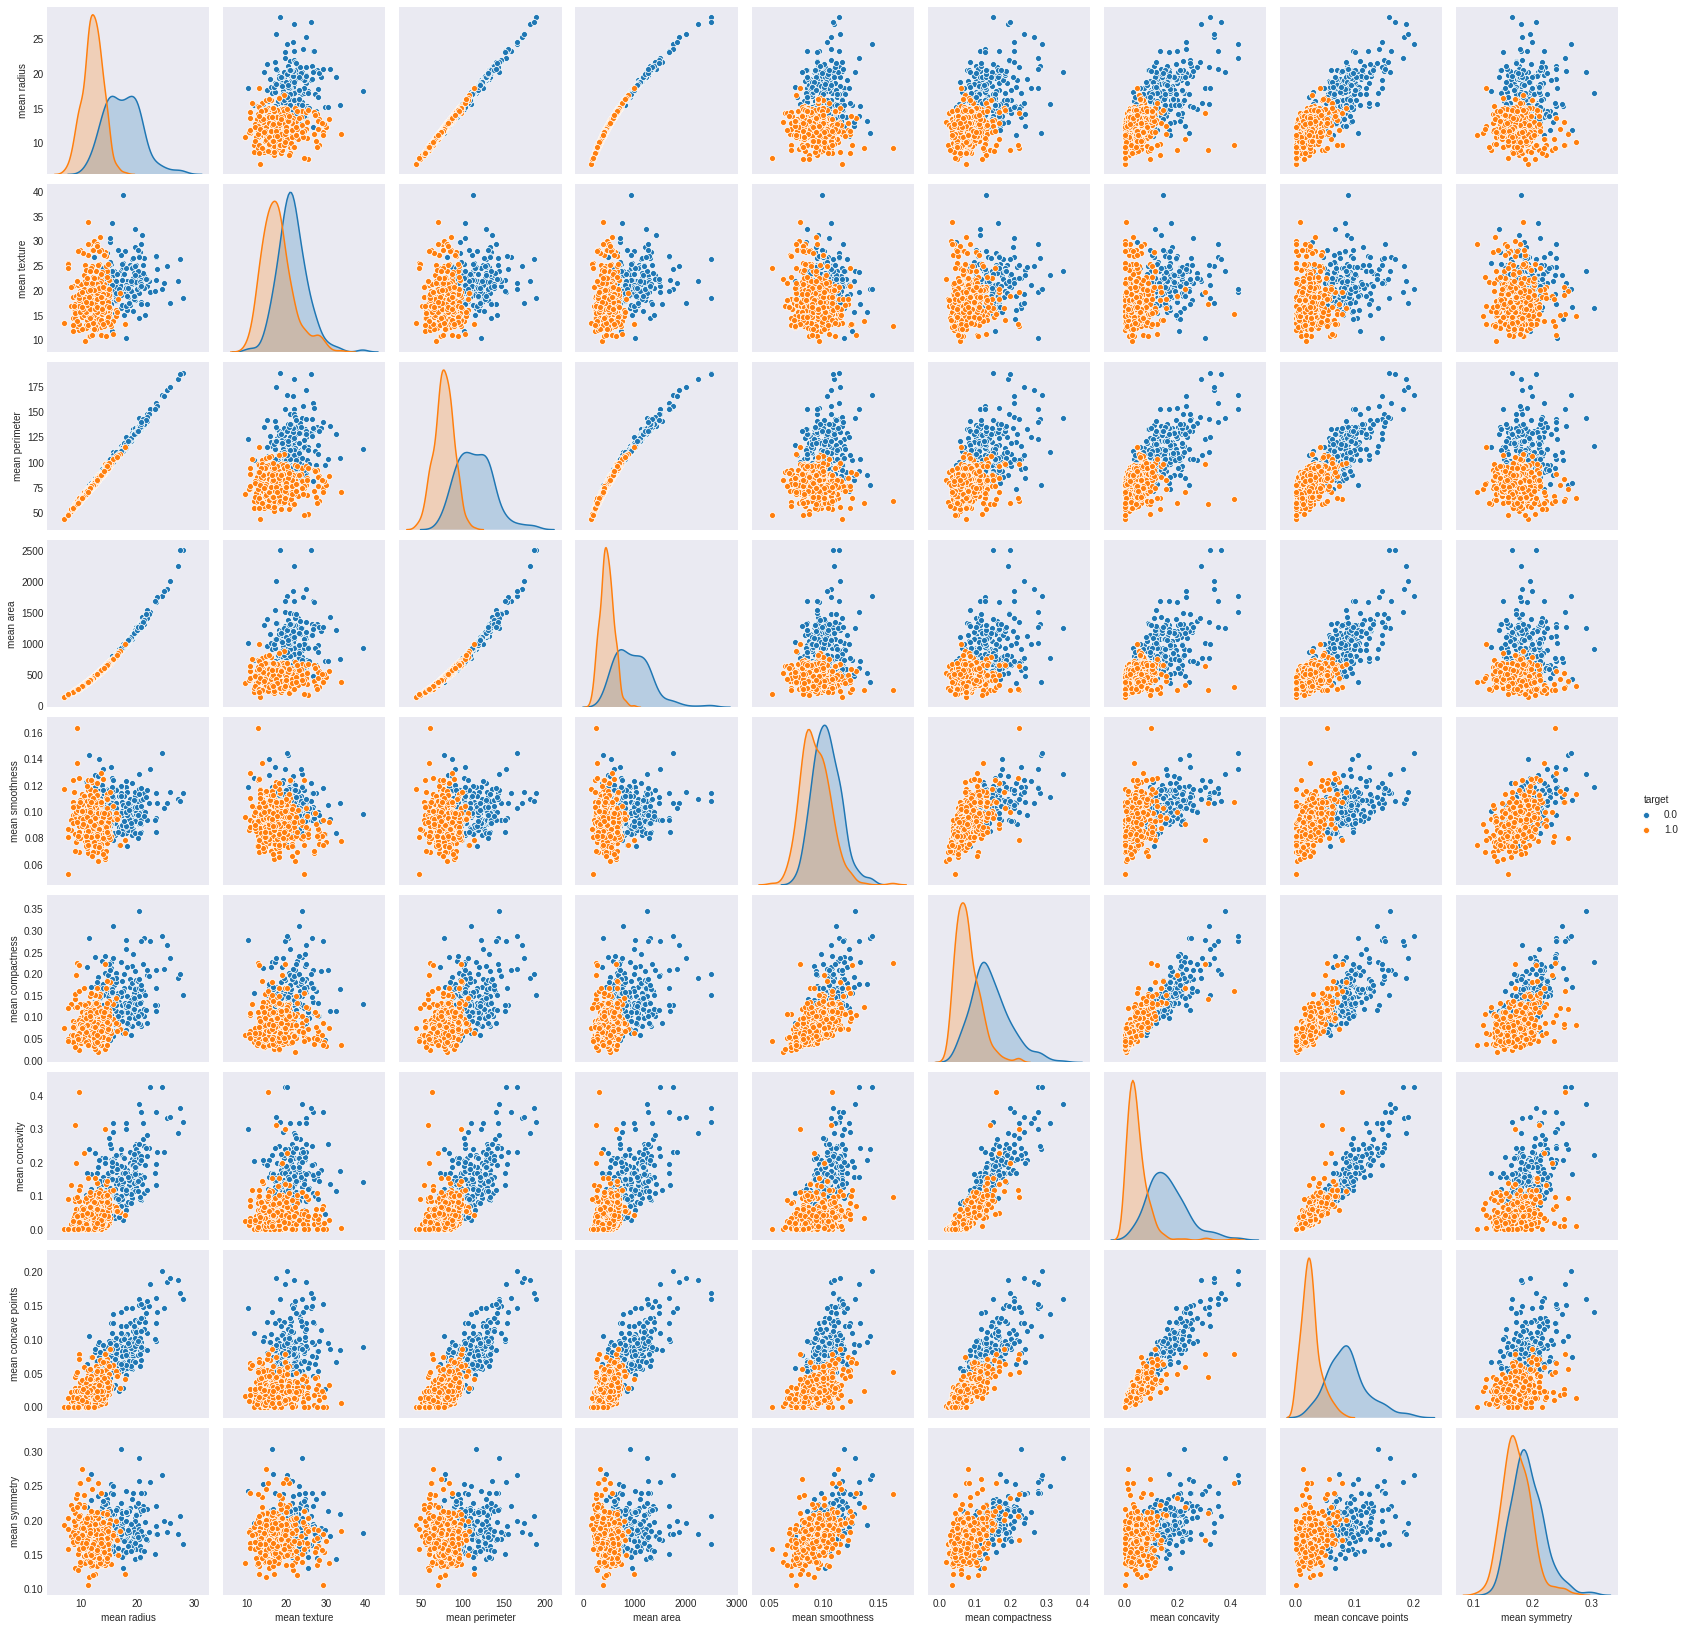

In [4]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],columns= Xnames + ['target'])

columns1= Xnames[0:9] + ['target']
vars1=columns1[0:9]

g1 = sns.pairplot(data1.loc[:,columns1],vars=vars1, hue="target")

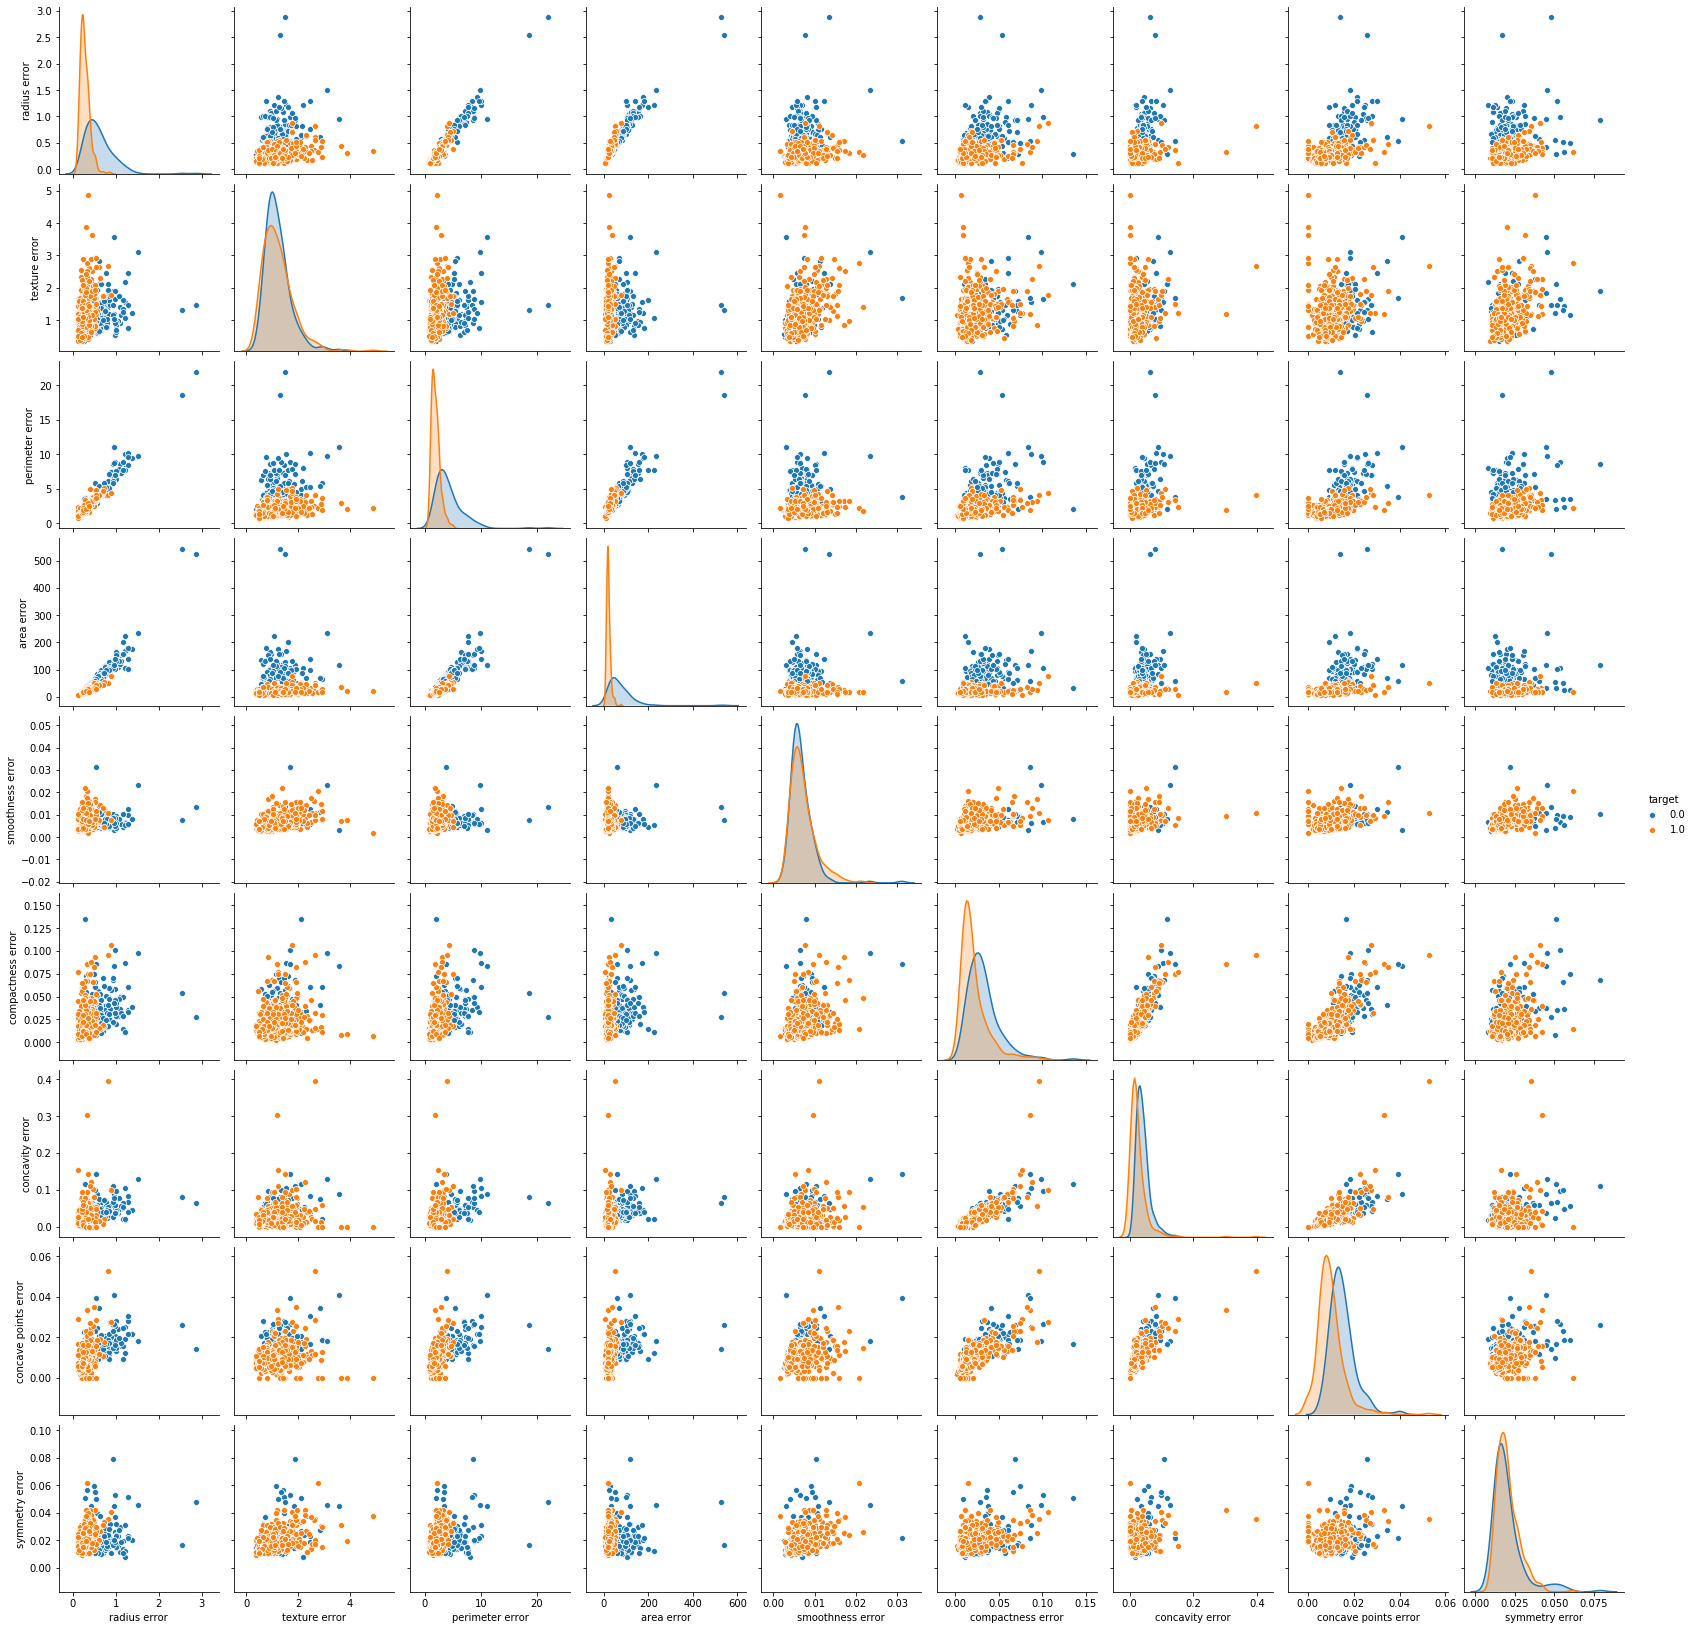

In [7]:
columns2= Xnames[10:19] + ['target']
vars2=columns2[0:9]

g2 = sns.pairplot(data1.loc[:,columns2],vars=vars2, hue="target")

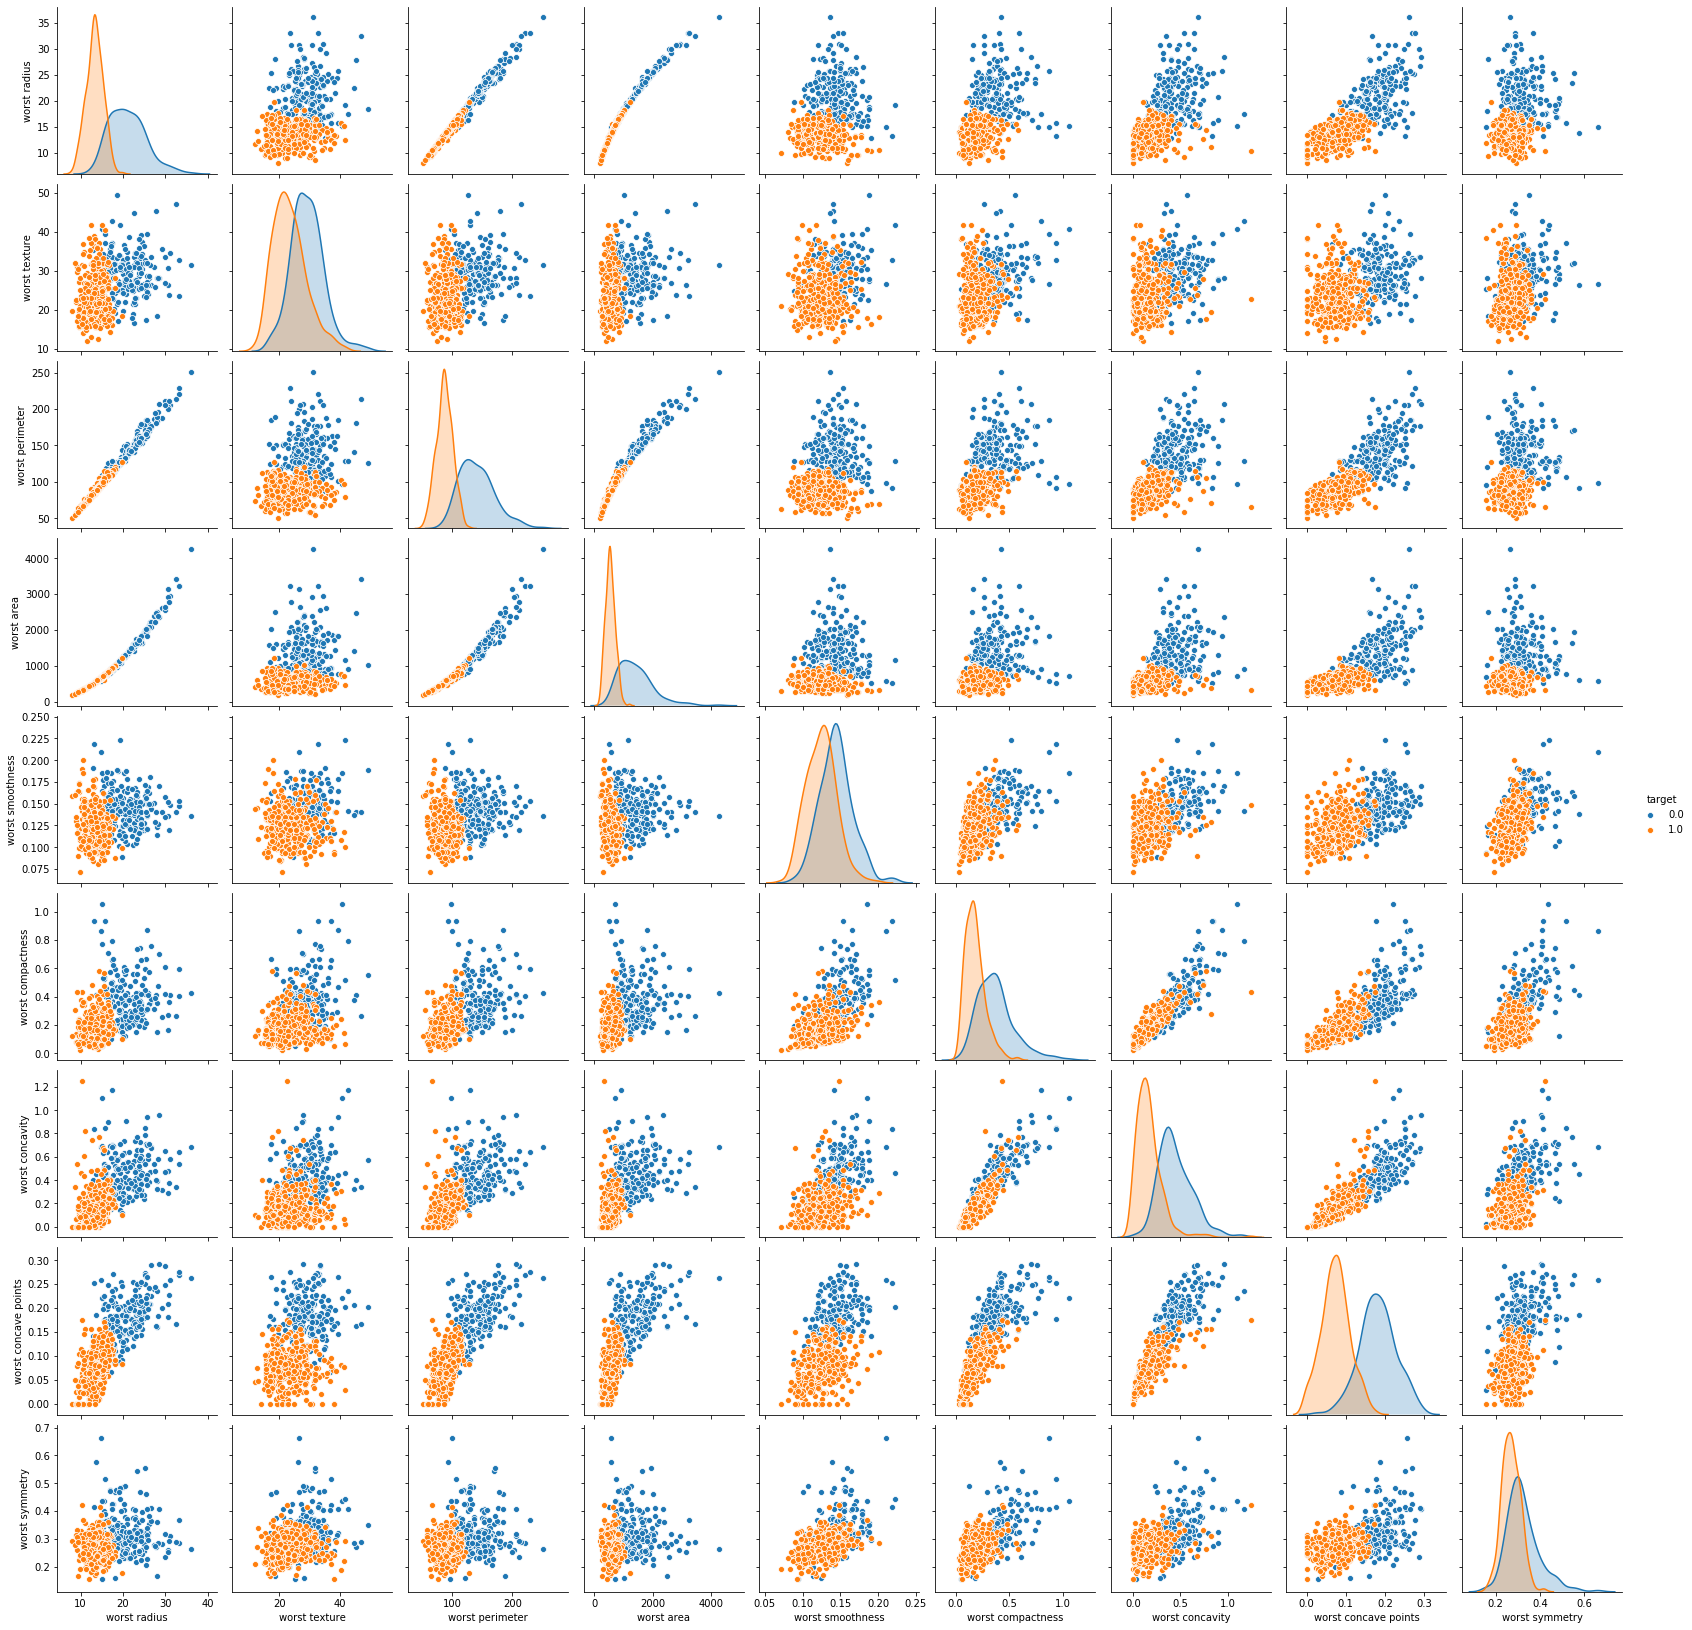

In [8]:
columns3= Xnames[20:30] + ['target']
vars3=columns3[0:9]

g3 = sns.pairplot(data1.loc[:,columns3],vars=vars3, hue="target")

### Respuesta
Podemos ver que si bien todas las escalas son distintas, hay atributos que generan regiones de clasificacion. Es decir, algunos atributos generan puntos linealmente separables y otros no. Habria que ver qué tanta información se pierde en los datos que son claramente separables respecto a los que no lo son, pero quizás una buena idea sería descartar los datos que no ofrecen ninguna clase de separación, como por ejemplo 'smoothness error' o 'compactness error'. Estas dos features parecen estar agregando ruido solamente

b) Podemos escalar las variables usando standard scaler, que centra restando por la media y divide por la desviacion estandar muestrales. En las primeras variables, los gráficos son muy parecidos, aunque se observa la diferencia en las escalas. Realice los gráficos para las restantes 20 variables, de a grupos de 10, e inspeccione. 

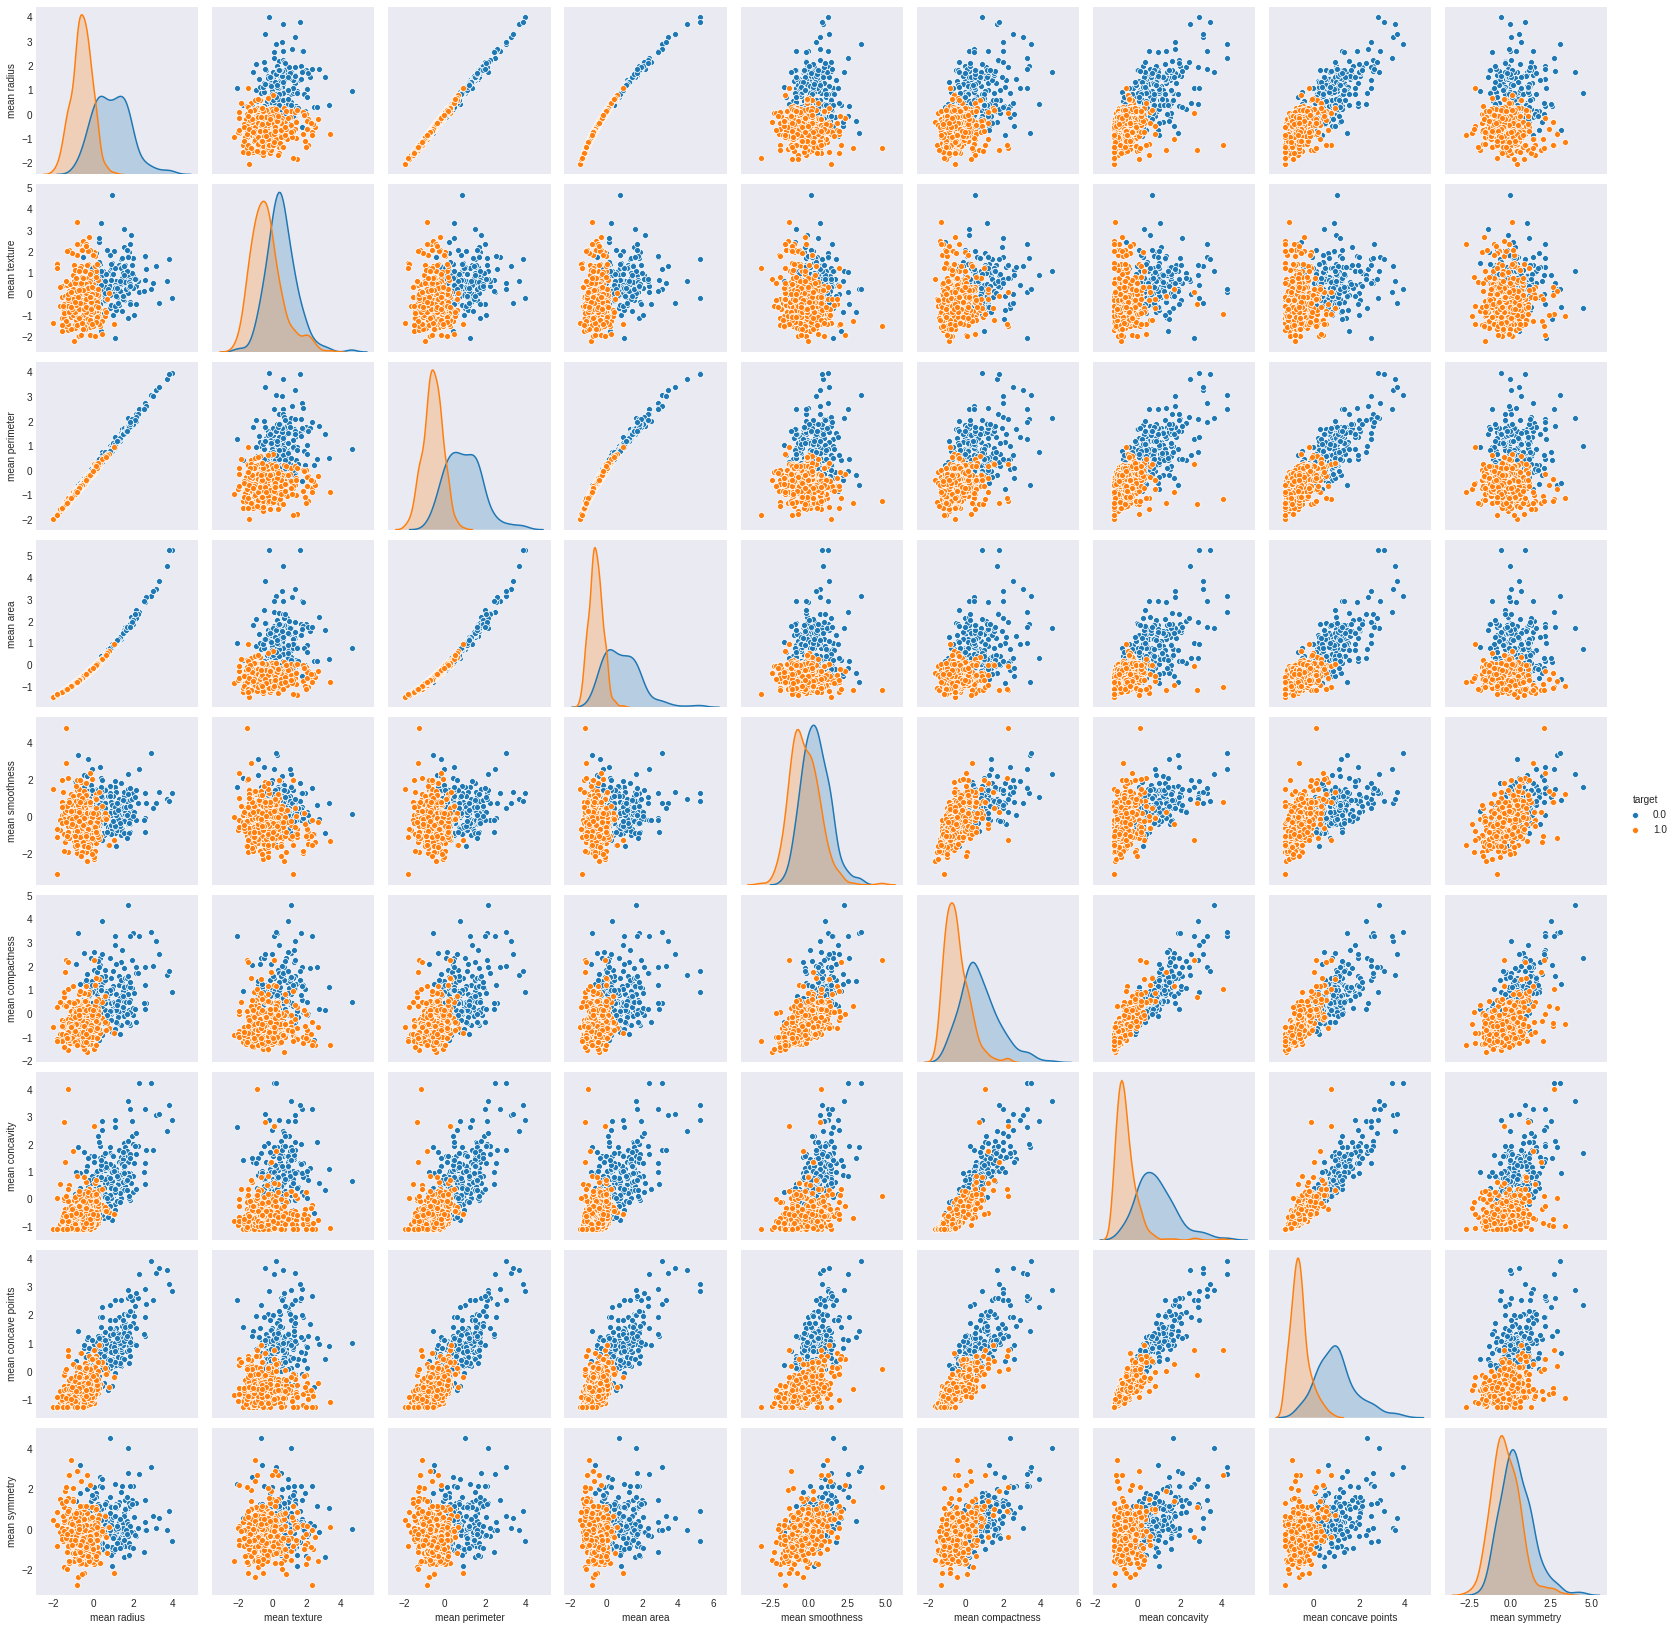

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer['data'])

scaled_df = pd.DataFrame(data= np.c_[X_scaled, cancer['target']],columns=Xnames+['target']) 

columns1= Xnames[0:9] + ['target']
vars1=columns1[0:9]

g1 = sns.pairplot(scaled_df.loc[:,columns1],vars=vars1, hue="target")

c) El siguiente codigo realiza PCA sobre todos los datos, los escala y calcula las regiones de clasificacion para 5-NN sobre las dos primeras PCA's. Calcule las regiones de clasificacion y los errores para $k$ variando entre 1 y 10. Genere un único plot con secciones para poder visualizar todas las regiones de clasificacion juntas. 

In [6]:
pca = decomposition.PCA(n_components=2)

scaler = StandardScaler()

X_data3 = scaler.fit_transform(cancer.data)

pca.fit(X_data3)
data3 = pca.transform(X_data3)

vr = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [7]:
df = pd.DataFrame(data=np.c_[data3,y], columns=["PC1", "PC2", "labels"])


Aqui ploteo usando el paquete de Sebastian Raschka, mlxtend, que tienen que instalar para poder usar. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data3,y,test_size=0.2,random_state=42)
scores = []

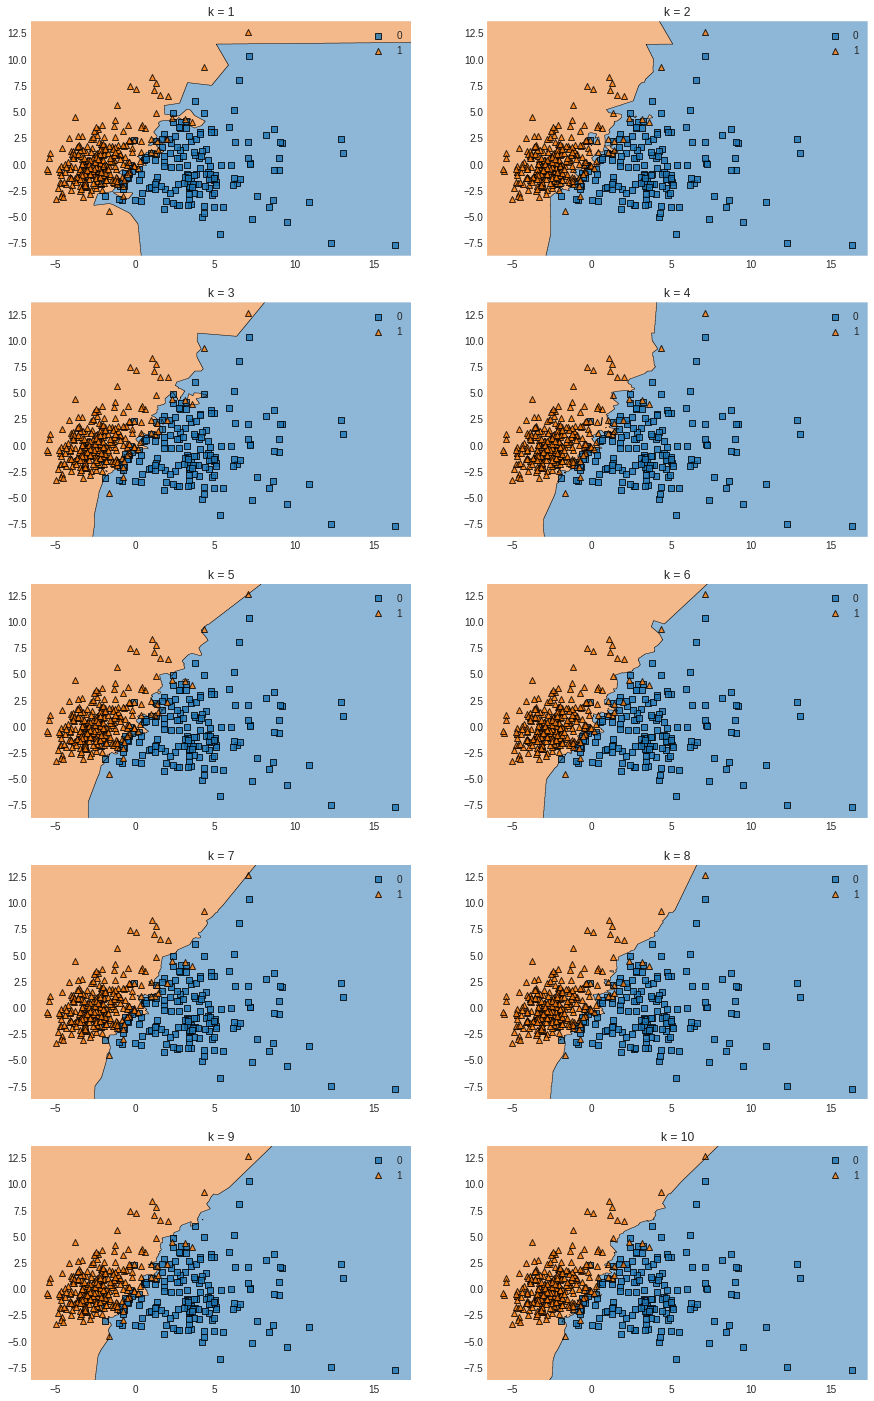

In [9]:
plt.figure(figsize=(15,25))
clfs = []
for k in range(1,11):
    
    plt.subplot(5,2,k)
    plt.title("k = {}".format(k))

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    clfs.append(knn)
    
    plot_decision_regions(X_train, y_train, knn)

In [16]:
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["K", "Test Score", "Train Score"]
for model in clfs:
    table.add_row([model.n_neighbors,model.score(X_test,y_test),model.score(X_train,y_train)])
print(table)  

+----+--------------------+--------------------+
| K  |     Test Score     |    Train Score     |
+----+--------------------+--------------------+
| 1  | 0.9736842105263158 |        1.0         |
| 2  | 0.9473684210526315 | 0.9406593406593406 |
| 3  | 0.9736842105263158 | 0.9428571428571428 |
| 4  | 0.9649122807017544 | 0.9428571428571428 |
| 5  | 0.9736842105263158 | 0.9428571428571428 |
| 6  | 0.9649122807017544 | 0.9362637362637363 |
| 7  | 0.9824561403508771 | 0.9428571428571428 |
| 8  | 0.9649122807017544 | 0.9384615384615385 |
| 9  | 0.9824561403508771 | 0.9516483516483516 |
| 10 | 0.9736842105263158 | 0.945054945054945  |
+----+--------------------+--------------------+


d) El siguiente codigo realiza PCA sobre todos los datos, sin escalar y calcula las regiones de clasificacion para 5-NN sobre las dos primeras PCA's. Calcule las regiones de clasificacion y los errores para $k$ variando entre 1 y 10. Genere un único plot con secciones para poder visualizar todas las regiones de clasificacion juntas. Compare con el plot anterior para ver si hay cambios visuales importantes en las regiones al escalar. 

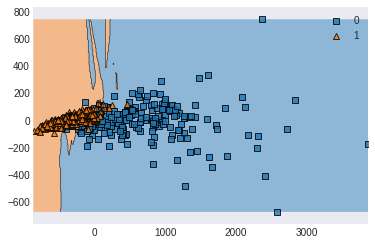

In [18]:
pca.fit(cancer.data)
data4 = pca.transform(cancer.data)
df4 = pd.DataFrame(data=np.c_[data4,y], columns=["PC1", "PC2", "labels"])
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(data4, y)

plot_decision_regions(data4, y, knn2)

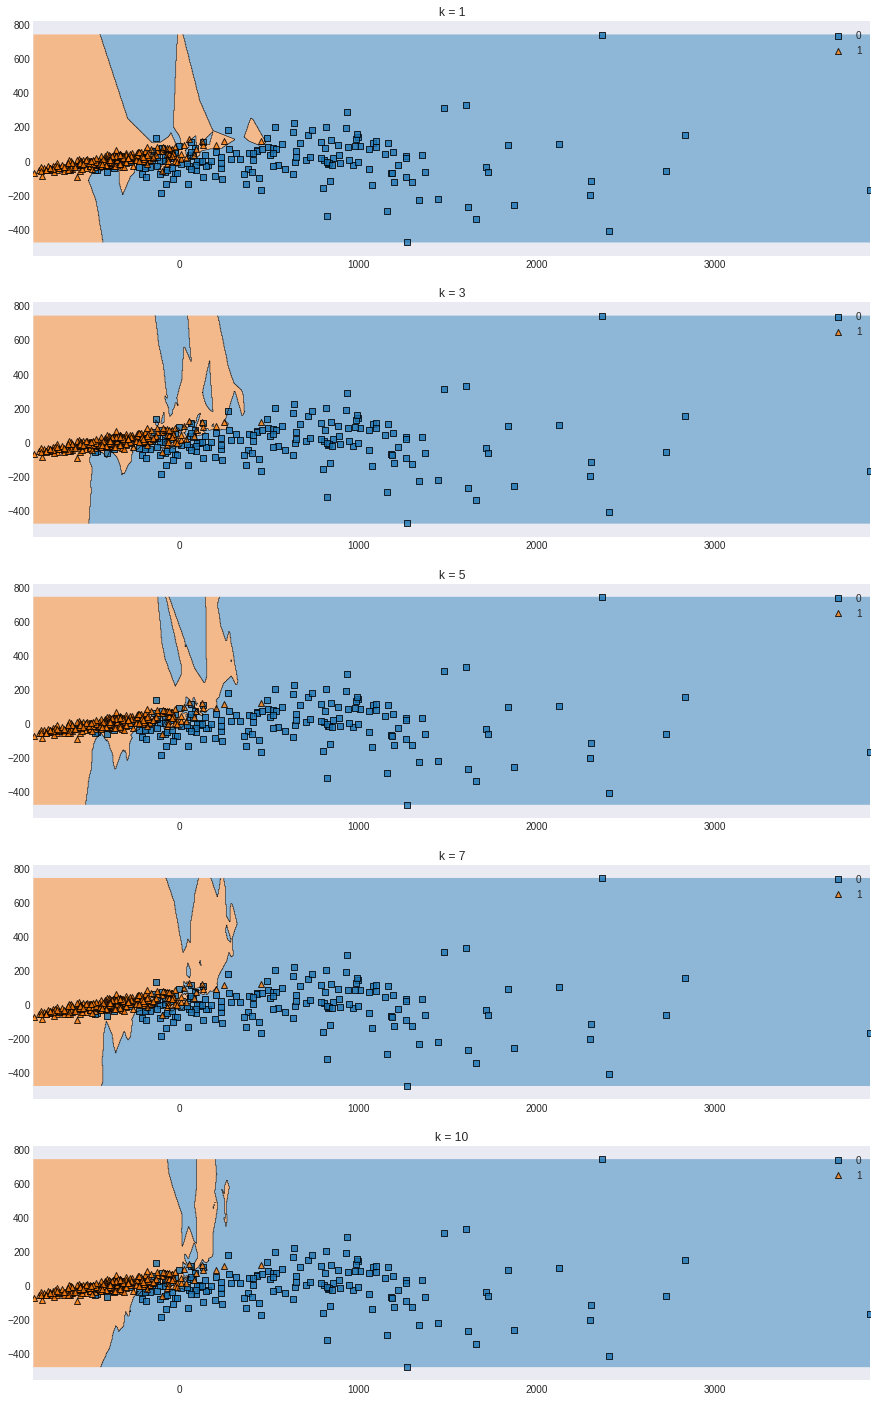

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data4,y,test_size=0.2,random_state=42)
clfs_noscaled = []
plt.figure(figsize=(15,25))
ks = [1,3,5,7,10]
for i,k in enumerate(ks):
    
    plt.subplot(5,1,i+1)
    plt.title("k = {}".format(k))

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    clfs_noscaled.append(knn)
    
    plot_decision_regions(X_train, y_train, knn)


Podemos apreciar que síb hay diferencias en el clasificador que no tiene escalados los datos. De hecho, sin escala no parece haber mucha diferencia entre distintos "k".

In [21]:
table = PrettyTable()

table.field_names = ["K", "Test Score", "Train Score"]
for model in clfs_noscaled:
    table.add_row([model.n_neighbors,model.score(X_test,y_test),model.score(X_train,y_train)])
print(table)  

+----+--------------------+--------------------+
| K  |     Test Score     |    Train Score     |
+----+--------------------+--------------------+
| 1  | 0.9210526315789473 |        1.0         |
| 3  | 0.9298245614035088 | 0.945054945054945  |
| 5  | 0.9473684210526315 | 0.9340659340659341 |
| 7  | 0.956140350877193  | 0.9340659340659341 |
| 10 | 0.9736842105263158 | 0.9274725274725275 |
+----+--------------------+--------------------+


Y aqui uso Matplotlib en datos sin escalar. Vale la pena mirar como se codifica, aunque el código de Rashka es mas lindo. 

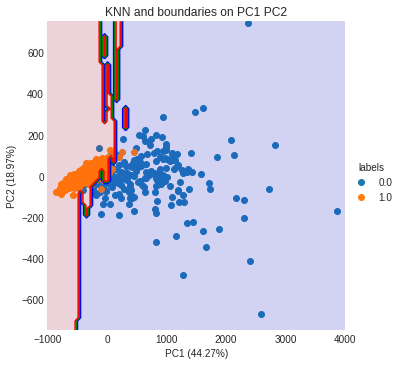

In [13]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X3 = np.linspace(-1000, 4000, N)
Y3 = np.linspace(-750, 750, N)
X3, Y3 = np.meshgrid(X3, Y3)


color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df4, hue="labels" , height=5) .map(plt.scatter, "PC1", "PC2",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz3 = np.array(  [knn2.predict( np.array([[xx3,yy3]])) 
                     for xx3, yy3 in zip(np.ravel(X3), np.ravel(Y3)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z3 = zz3.reshape(X3.shape)


#Plot the filled and boundary contours
my_ax.contourf( X3, Y3, Z3, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X3, Y3, Z3, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title

my_ax.set_xlabel('PC1 (44.27%)')
my_ax.set_ylabel('PC2 (18.97%)')
my_ax.set_title('KNN and boundaries on PC1 PC2')


#plt.savefig('images/04_pca_lda2.png', dpi=300)
plt.show()

e) Haga una tabla con el score de knn sobre la muestra para cada $k$ escalando y sin escalar. Utilice prettytable y  confusion matrix.  

knn score
0.9384885764499121


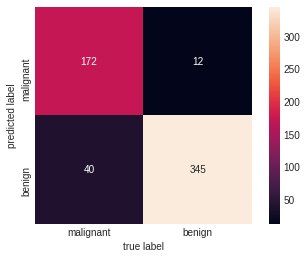

In [14]:
# datos sin escalar 

from sklearn.metrics import confusion_matrix
y_pred = knn.predict(data4)
print('knn score')
print(knn2.score(data4, y))

mat = confusion_matrix(y, y_pred)

#cmap=plt.cm.Reds
#cmap=plt.cm.Blues
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=Y_labels, yticklabels=Y_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

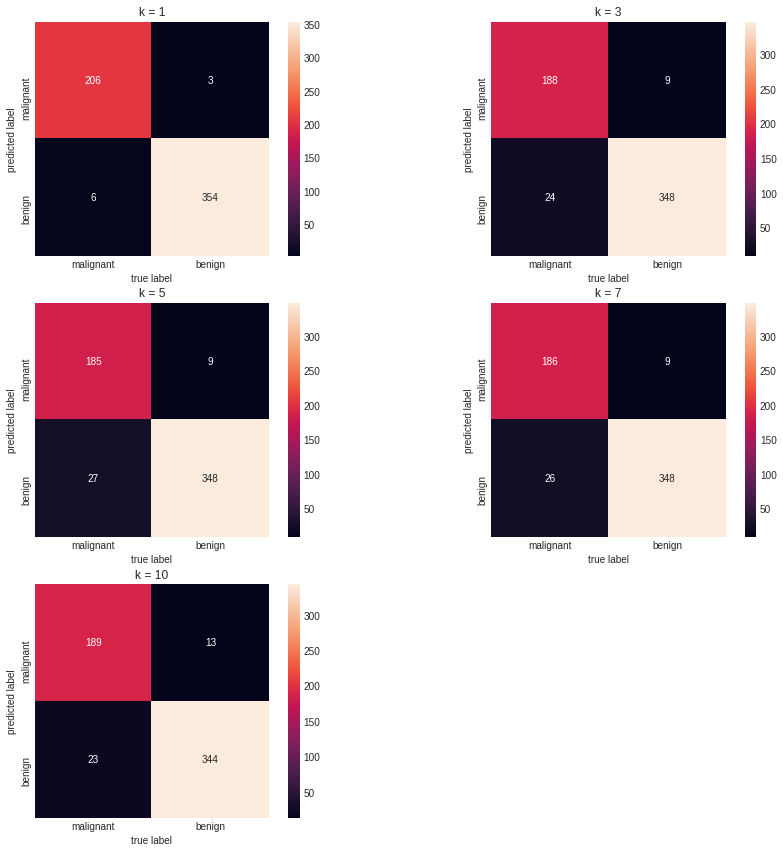

In [25]:
plt.figure(figsize=(15,25))
from sklearn.metrics import confusion_matrix

for i,model in enumerate(clfs_noscaled):
    plt.subplot(5,2,i+1)
    y_pred = model.predict(data4)
    mat = confusion_matrix(y, y_pred)
    plt.title("k = {}".format(model.n_neighbors))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=Y_labels, yticklabels=Y_labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    

In [15]:
print(Y_labels)

['malignant' 'benign']


knn score
0.9525483304042179


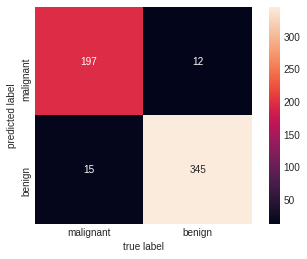

In [16]:
#datos escalados 

from sklearn.metrics import confusion_matrix
y_pred = knn.predict(data3)
print('knn score')
print(knn.score(data3, y))

mat = confusion_matrix(y, y_pred)

#cmap=plt.cm.Reds
#cmap=plt.cm.Blues
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=Y_labels, yticklabels=Y_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

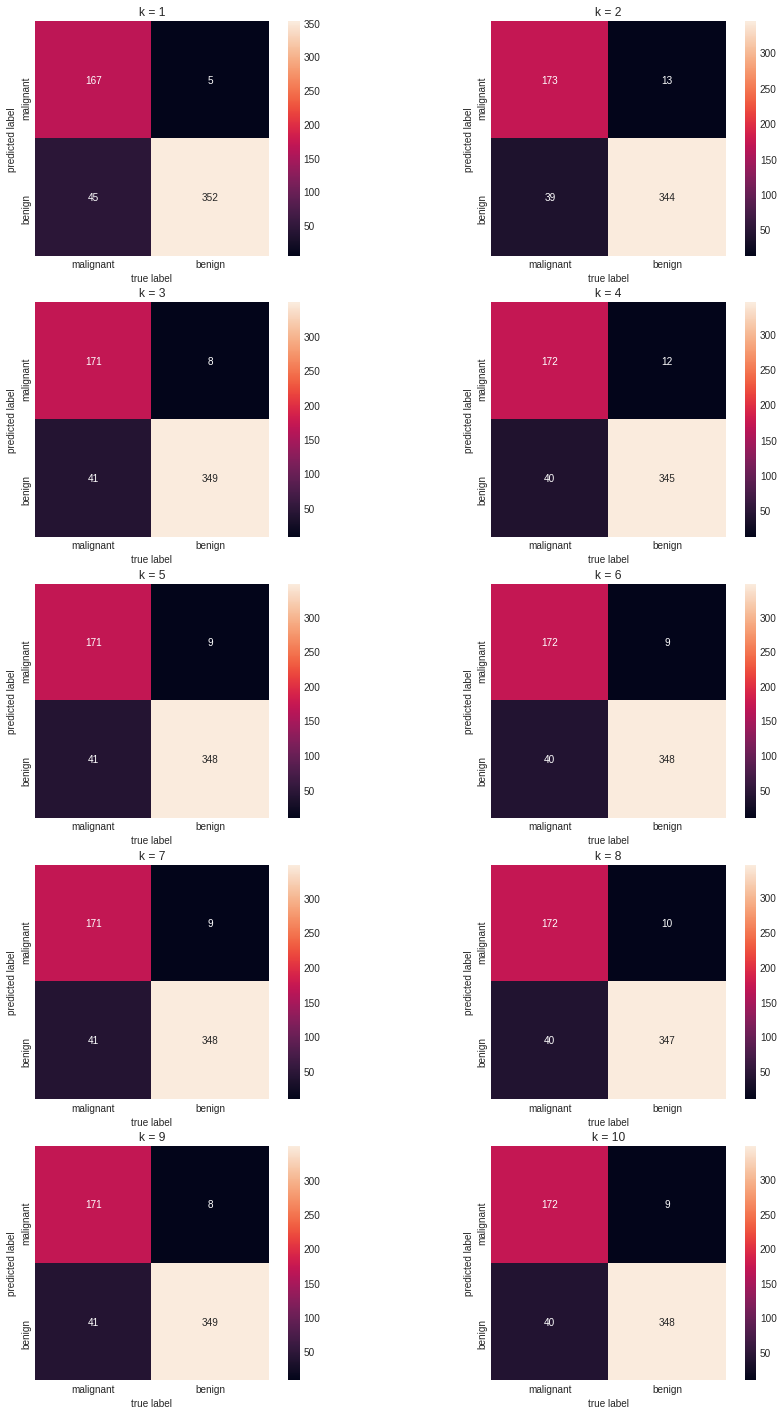

In [27]:
plt.figure(figsize=(15,25))
for i,model in enumerate(clfs):
    plt.subplot(5,2,i+1)
    y_pred = model.predict(data4)
    mat = confusion_matrix(y, y_pred)
    plt.title("k = {}".format(model.n_neighbors))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=Y_labels, yticklabels=Y_labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    